# DECISION TREE IMPLEMENTATION

In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier , plot_tree, export_text    #creates the decision tree model
from sklearn.model_selection import train_test_split         #splits the dataset into training and testing data
from sklearn.metrics import accuracy_score         #measures how well our model performs                        

from sklearn.tree import export_graphviz      #used for high visualization of the decisioon tree


In [4]:

iris = load_iris()  #loads the iris datasets which is built in scikit learn
df = pd.DataFrame( data= iris.data , columns = iris.feature_names )   #converts the datasets into datastructured DataFrame with column names
df['species'] = iris.target   # adds a target column
print(df.head())     #prints the first five rows of the iris dataset


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [5]:
x= iris.data     #stores the independent variable(features)
y= iris.target   #stores the dependent variable(species)
x_train, x_test ,y_train ,y_test =train_test_split(x,y,test_size=0.2,random_state=42)   #random_state ensures that we get the same split everytime


In [6]:
#TRAIN THE DECISION TREE CLASSIFIER

#create the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf = DecisionTreeClassifier(criterion='gini' ,max_depth=3, random_state = 42)

#Train the model
clf.fit(x_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
#EVALUATE THE MODEL

#predict the test set

y_pred=clf.predict(x_test)

#calculate accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


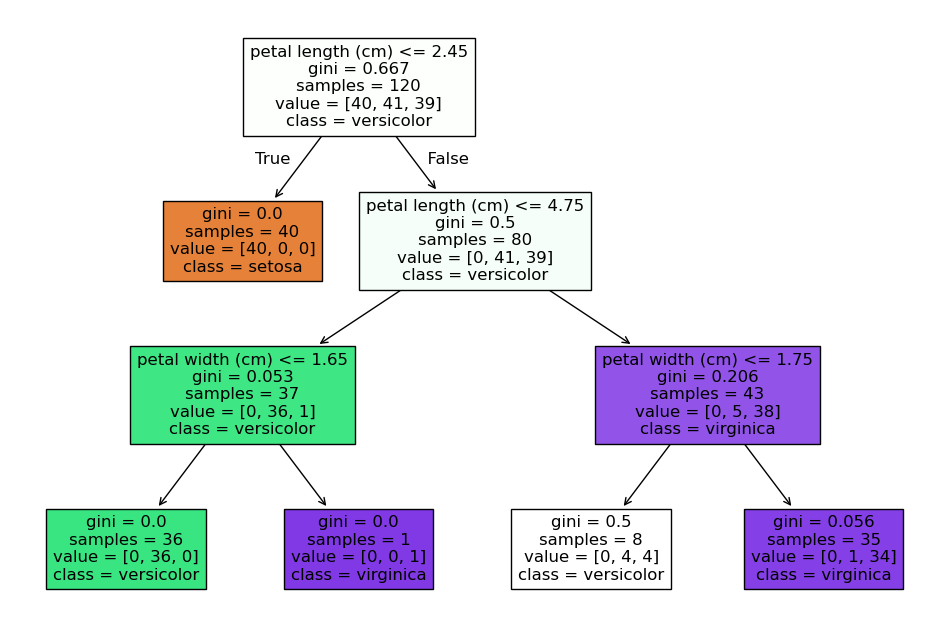

In [8]:
#VISUALISING THE DECISION TREE

plt.figure(figsize=(12,8))
plot_tree(clf , filled=True , feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [9]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import graphviz
print(graphviz.__version__)

0.20.3


In [11]:
#using graphiz for better visualisation
dot_data=export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True , rounded=True ,special_characters=True)

#render the tree
graph=graphviz.Source(dot_data)
graph.render("Decision Tree")
graph.view()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH